In [4]:
# 1) 2D 음파 그래프
# 2) Fourier Transform
# 3) short term Fourier Transform
# 4) Spectogram
# 5) Mel Spectogram
# 6) Mel-Frequency Cepstral Coefficients (MFCCs)
# 의 관계를 따라가면서 알아보기 위한!!! 악!~!!!!

import librosa
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# 목소리 불러와~
f_y, sr = librosa.load('C:/nmb/data/teamvoice_clear/testvoice_F2(clear).wav', sr=22050) 
m_y, sr = librosa.load('C:/nmb/data/teamvoice_clear/testvoice_M2(clear).wav', sr=22050)

print(len(f_y))
print('Audio length (seconds): %.2f' % (len(f_y) / sr))
print('Audio length (seconds): %.2f' % (len(m_y) / sr))

110250
Audio length (seconds): 5.00
Audio length (seconds): 5.00


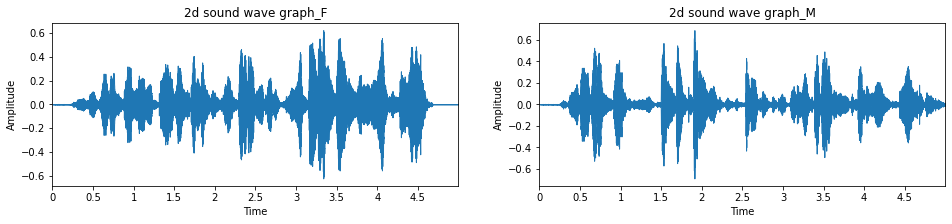

In [6]:
# 1) 2D 음파 그래프

plt.figure(figsize=(16, 3))
plt.subplot(1,2,1)
plt.title('2d sound wave graph_F')
librosa.display.waveplot(y=f_y, sr=sr)
plt.ylabel("Amplitude")
plt.subplot(1,2,2)
plt.title('2d sound wave graph_M')
librosa.display.waveplot(y=m_y, sr=sr)
plt.ylabel("Amplitude")
plt.show()

# ===========================
# x축: time
# y축: amplitude

(110250,)
C:\Users\lemon\anaconda3\envs\project\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Fourier Transform')

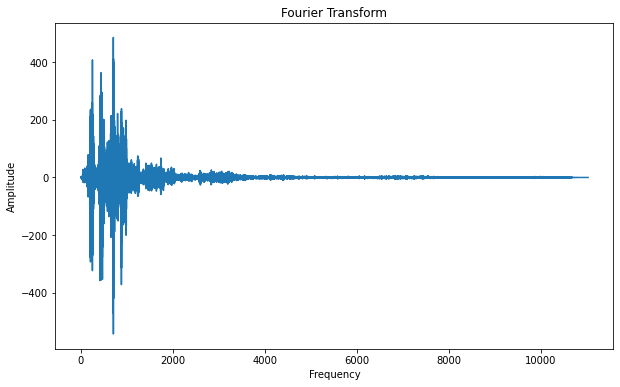

In [19]:
# 2) Fourier Transform
# 전체 오디오에 대해 x축의 시간을 주파수로 바꿔서 보자

fft = np.fft.fft(f_y)

f = np.linspace(0,sr,len(fft))
left_spectrum = fft[:int(len(fft) / 2)]
left_f = f[:int(len(fft) / 2)]

plt.figure(figsize=(10, 6))
plt.plot(left_f, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("Fourier Transform")

Text(0.5, 1.0, 'Fourier Transform')

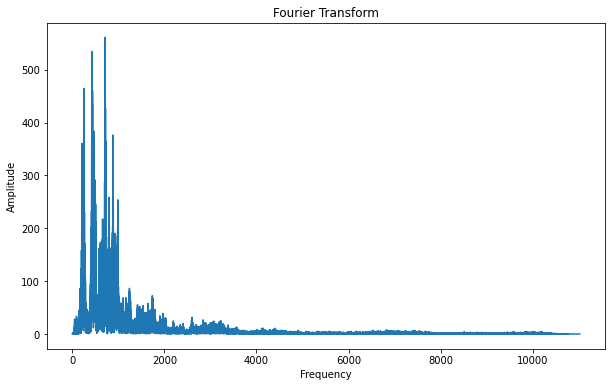

In [20]:
# 2) Fourier Transform
# 전체 오디오에 대해 x축의 시간을 주파수로 바꿔서 보자

fft = np.fft.fft(f_y)
amplitude = np.abs(fft) 
f = np.linspace(0,sr,len(amplitude))
left_spectrum = amplitude[:int(len(amplitude) / 2)]
left_f = f[:int(len(amplitude) / 2)]

plt.figure(figsize=(10, 6))
plt.plot(left_f, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("Fourier Transform")


(1025, 216)
(257, 862)


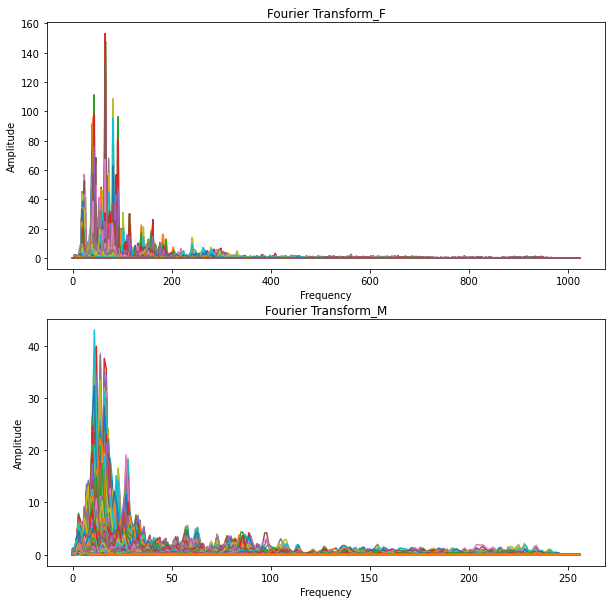

In [12]:
# 3) short term Fourier Transform
# 그런데 그냥 퓨리에 트랜스폼은 시간을 쪼개서 볼 수가 없잖아!
# 그래서 시간을 쪼개서 쓸거야! 그 길이는 512고 겹치는 건 128
# 시간 영역 데이터를 주파수 영역으로 변경

f_D = np.abs(librosa.stft(f_y, n_fft=2048, hop_length=512))
m_D = np.abs(librosa.stft(m_y, n_fft=512, hop_length=128))

# 1000ms = 1s

# n_fft = 2048 = 93ms > shape: (1025, 216)
# n_fft = 512 = 23ms > shape: (257, 862)
# 더 작게 쪼갤 수록 시간당 amplitude는 줄어든다.

print(f_D.shape)
print(m_D.shape)
# f_d.shape[0] = (1+n_fft)/2

plt.figure(figsize=(10, 10))
plt.subplot(2,1,1)
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title('Fourier Transform_F')
plt.plot(f_D)
plt.subplot(2,1,2)
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title('Fourier Transform_M')
plt.plot(m_D)
plt.show()

# ===========================
# x축: frequency(hz)
# y축: amplitude
# 그래프의 색: 쪼갠 시간초

In [ ]:
# 4) Spectogram
# 시간에 따른 신호 주파수의 스펙트럼 그래프
